### DS Challenge LATAM Airlines
#### Oscar Quintana
##### 0. Preprocesamiento

In [1]:
#Paquetes a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lee datos y los inserta en un df
df = pd.read_csv('dataset_SCL.csv')

C:\Users\oscar\AppData\Local\Temp\ipykernel_5356\553996775.py:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_SCL.csv')


In [3]:
#Revisa el encabezado del df
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
#Se revisa la estructura de los datos y los missing
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB
None


In [5]:
#Se detecta un missing en la columa 'Vlo-O'.
df[df['Vlo-O'].isna()]
#No parece ser relevante para el análisis, por lo tanto no se imputa.

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [6]:
#Se convierten columnas a formato fecha
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

##### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

            Vlo-O             
TIPOVUELO       I            N
AÑO          2017 2018    2017
MES                           
1         2802.00 2.00 3303.00
2         2499.00  NaN 3062.00
3         2496.00  NaN 2986.00
4         2354.00  NaN 2666.00
5         2428.00  NaN 2812.00
6         2373.00  NaN 2608.00
7         2865.00  NaN 3127.00
8         2719.00  NaN 3025.00
9         2605.00  NaN 3005.00
10        2687.00  NaN 3345.00
11        2610.00  NaN 3470.00
12        2799.00  NaN 3557.00
                  Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O  Vlo-O  \
66918 2017-12-31 23:55:00   602  SCEL  KLAX   LAN 2018-01-01 00:02:00 602.00   
66947 2017-12-31 23:40:00   622  SCEL  MMMX   LAN 2018-01-01 00:12:00 622.00   

      Ori-O Des-O Emp-O  ...        OPERA  SIGLAORI          SIGLADES  \
66918  SCEL  KLAX   LAN  ...  Grupo LATAM  Santiago       Los Angeles   
66947  SCEL  MMMX   LAN  ...  Grupo LATAM  Santiago  Ciudad de Mexico   

         fecha_d Hora one temporada_alta di

[Text(0.5, 0, 'Hora del día'), Text(0, 0.5, 'Número de vuelos')]

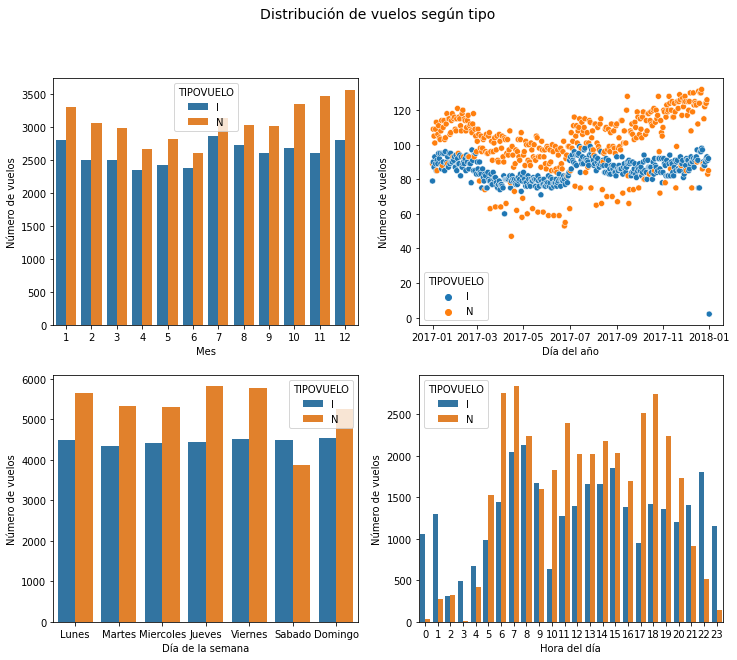

In [33]:
#Distribución de los datos según año y mes
print(pd.pivot_table(df, values = ['Vlo-O'], index = ['MES'], columns = ['TIPOVUELO', 'AÑO'], aggfunc = 'count'))
#Existen solamente 2 datos del año 2018 para los vuelos internacionales. Seguramente corresponden a atrasos del 2017. Se verifica esta situación:
print(df[df['AÑO'] == 2018])

#Grafica distribución de vuelos durante el año
#Genera variable fecha redondeando a nivel de día
df['fecha_d'] = pd.to_datetime(dict(year = df.AÑO, month = df.MES, day = df.DIA))
df['Hora'] = df['Fecha-I'].dt.hour
df['one'] = 1

df_sum_d = df[['AÑO', 'MES', 'DIA', 'fecha_d', 'Vlo-O', 'TIPOVUELO']].groupby(['AÑO', 'MES', 'DIA', 'fecha_d', 'TIPOVUELO'], as_index=False).count()

#Grafica distribución de vuelos en el tiempo y según tipo
fig, ax = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle('Distribución de vuelos según tipo', fontsize=14)
plt1 = sns.barplot(
    data = df, 
    x = 'MES', 
    y = 'one', 
    hue = 'TIPOVUELO', 
    estimator = sum, 
    errorbar = None, 
    ax = ax[0,0]
    )
plt1.set(xlabel='Mes', ylabel='Número de vuelos')
plt2 = sns.scatterplot(
    data=df_sum_d, 
    x='fecha_d', 
    y='Vlo-O', 
    hue='TIPOVUELO', 
    ax = ax[0,1]
    )
plt2.set(xlabel='Día del año', ylabel='Número de vuelos')
plt3 = sns.barplot(
    data = df, 
    x = 'DIANOM', 
    y = 'one', 
    hue = 'TIPOVUELO', 
    estimator = sum,
    order = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'], 
    errorbar = None, 
    ax = ax[1,0]
    )
plt3.set(xlabel='Día de la semana', ylabel='Número de vuelos')
plt4 = sns.barplot(
    data = df, 
    x = 'Hora', 
    y = 'one', 
    hue = 'TIPOVUELO', 
    estimator = sum,
    errorbar = None, 
    ax = ax[1,1]
    )
plt4.set(xlabel='Hora del día', ylabel='Número de vuelos')


* El aeropuerto de origen es el mismo para todos los casos (SCL), reflejado en las variables `Ori-I`, `Ori-O` y `SIGLAORI`.
* En los vuelos nacionales e internacionales el mayor número de vuelos está asociado al período de vacaciones de invierno y verano.
* El menor tráfico de febrero de la serie mensual se explica por la menor cantidad de días que tiene el mes, donde ajustando por el menor número de días se llega a 2,661 vuelos $(2/30 \approx 6.5\% \rightarrow 2499*(1+6,5\%) = 2,661)$. Esto es evidente de igual manera en el gráfico de vuelos por día, donde los vuelos diaros de febrero son comparables a los de enero, aunque en los vuelos internacionales se modera el tráfico en febrero.
* En los vuelos nacionales, además, se observa una alta demanda en octubre y noviembre.
* En serie diaria llama la atención la discontinuidad que se genera en julio, tanto en la serie nacional como en la internacional, lo que estaría asociado al inicio de las vacaciones de invierno para las y los estudiantes.
* En la distribución por día de la semana, es notable el menor número de vuelos los días sábados en el segmento nacional, mientras que el mayor número de vuelos se observa los días viernes, sábados y lunes, que se corresponde con la semana laboral.
* En la segmentación según hora del día se aprecia un menor número de salidas entre las 2 AM y las 4 AM, junto a caídas notorias en la serie internacional a las 10 AM y a las 17 PM. En la serie nacional se detaca el alto número de salidas entre las 6 AM y 7 AM, y entre las 17 PM y 18 PM, lo que coincide con el inicio y término de las jornadas laborales. 
* Podría ser informativo hacer otras segmentaciones, como según destino norte/sur (nacionales), continental/intercontinental (internacional), así como evaluar distribuciones conjuntas entre las variables más allá de la segmentación nacional/internacional.

##### 2. Genera las columnas adicionales y luego expórtelas en un archivo `synthetic_features.csv` :
* `temporada_alta` : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
* `dif_min` : diferencia en minutos entre Fecha-O y Fecha-I .
* `atraso_15` : 1 si dif_min > 15, 0 si no.
* `periodo_dia` : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .

In [8]:
#Definimos 'temporada_alta'
df['temporada_alta'] = 0
df.loc[(df['Fecha-I'] >= '2016-12-15 00:00:00') & (df['Fecha-I'] < '2017-04-03 00:00:00'), 'temporada_alta'] = 1
df.loc[(df['Fecha-I'] >= '2017-12-15 00:00:00') & (df['Fecha-I'] < '2018-04-03 00:00:00'), 'temporada_alta'] = 1
df.loc[(df['Fecha-I'] >= '2017-07-15 00:00:00') & (df['Fecha-I'] < '2017-08-01 00:00:00'), 'temporada_alta'] = 1
df.loc[(df['Fecha-I'] >= '2017-09-11 00:00:00') & (df['Fecha-I'] < '2017-10-01 00:00:00'), 'temporada_alta'] = 1

In [9]:
#Definimos 'dif_min'
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60

In [10]:
#Definimos 'atraso_15'
df['atraso_15'] = 0
df.loc[df['dif_min']>15, 'atraso_15'] = 1

In [11]:
#Definimos 'periodo_dia'
df.loc[(df['Fecha-I'].dt.hour>=5) & (df['Fecha-I'].dt.hour<12), 'periodo_dia'] = 'mañana'
df.loc[(df['Fecha-I'].dt.hour>=12) & (df['Fecha-I'].dt.hour<19), 'periodo_dia'] = 'tarde'
df.loc[df['periodo_dia'].isna(), 'periodo_dia'] = 'noche'

In [12]:
#Genera archivo synthetic_features.csv
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv', index=False)

##### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

  TIPOVUELO    one  atraso_15  tasa_atraso
0         I  31240       7048    22.560819
1         N  36966       5566    15.057079


[Text(0, 0, '22.5608'), Text(0, 0, '15.0571')]

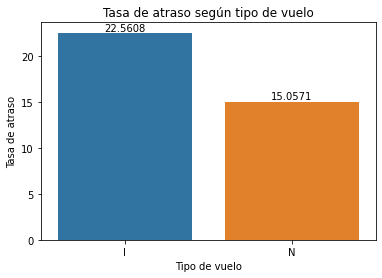

In [13]:
#Atrasos según tipo de vuelo
df_aux = df[['TIPOVUELO','one','atraso_15']].groupby(['TIPOVUELO'], as_index=False).sum()
df_aux['tasa_atraso'] = df_aux['atraso_15'] / df_aux['one'] * 100
print(df_aux)

#Gráficos de tasas de atraso, según tipo de vuelo
plt0 = sns.barplot(
    data = df_aux, 
    x = 'TIPOVUELO', 
    y = 'tasa_atraso', 
    estimator = sum, 
    order = ['I','N'], 
    errorbar=None
    )
plt0.set(
    title = 'Tasa de atraso según tipo de vuelo', 
    xlabel = 'Tipo de vuelo', 
    ylabel = 'Tasa de atraso'
    )
plt0.bar_label(plt0.containers[0])

Por tipo de vuelo se observa una diferencia importante en la tasa de atraso, donde el segmento internacional está un 49.8% por sobre el tipo nacional. En los vuelos internacionales, a diferencia de los nacionales, están sujetos a 'las libertades del aire' y otras restricciones que pudiesen imponer las autoridades aeronáuticas de los países de destino. Dado lo anterior, para el análisis de las tasas de atraso se mantendrá la distinción según tipo de vuelo.

Tasas de atraso de principales destinos, según tipo de vuelo
   TIPOVUELO          SIGLADES   one  atraso_15  tasa_atraso
5          I      Buenos Aires  6335       1620    25.572218
18         I              Lima  5270       1214    23.036053
40         I         Sao Paulo  3569        881    24.684786
9          I  Ciudad de Panama  1850        116     6.270270
23         I           Mendoza  1625        443    27.261538

   TIPOVUELO      SIGLADES   one  atraso_15  tasa_atraso
46         N   Antofagasta  5786        847    14.638783
49         N        Calama  5146        629    12.223086
57         N  Puerto Montt  4357        734    16.846454
51         N    Concepcion  3993        623    15.602304
53         N       Iquique  3747        640    17.080331


Mayores tasas de atraso por destino, vuelos internacionales
   TIPOVUELO        SIGLADES  one  atraso_15  tasa_atraso
34         I           Quito    2          2   100.000000
10         I      Cochabamba    1          1   100.0

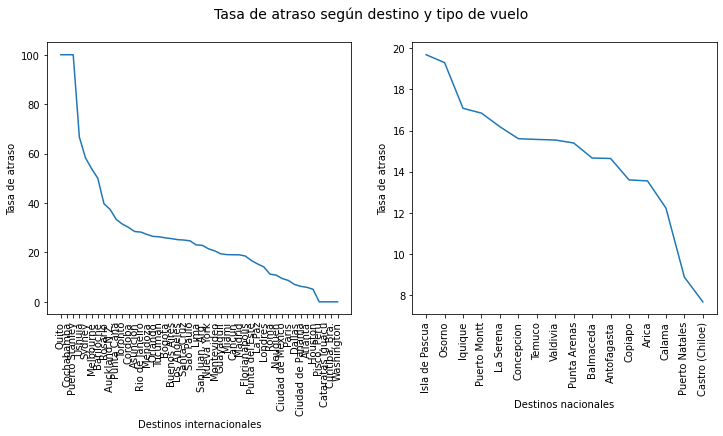

In [14]:
#Atrasos en principales destinos nacionales e internacionales
df_aux = df[['TIPOVUELO', 'SIGLADES', 'one', 'atraso_15']].groupby(['TIPOVUELO', 'SIGLADES'], as_index=False).sum()
df_aux['tasa_atraso'] = df_aux['atraso_15'] / df_aux['one'] * 100

print('Tasas de atraso de principales destinos, según tipo de vuelo')
print(df_aux[df_aux['TIPOVUELO']=='I'].sort_values(by=['one'], ascending=False).head(5))
print()
print(df_aux[df_aux['TIPOVUELO']=='N'].sort_values(by=['one'], ascending=False).head(5))
print('\n')
print('Mayores tasas de atraso por destino, vuelos internacionales')
print(df_aux[df_aux['TIPOVUELO']=='I'].sort_values(by=['tasa_atraso'], ascending=False).head(10))

#Gráficos de tasas de atraso, según tipo de vuelo
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Tasa de atraso según destino y tipo de vuelo', fontsize=14)
plt1 = sns.lineplot(
    data=df_aux[df_aux['TIPOVUELO']=='I'].sort_values(by=['tasa_atraso'], ascending=False), 
    x='SIGLADES', 
    y='tasa_atraso', 
    ax=ax[0]
    )
plt1.set(xlabel = 'Destinos internacionales', ylabel = 'Tasa de atraso')
plt1.tick_params(axis='x', rotation=90)
plt2 = sns.lineplot(
    data=df_aux[df_aux['TIPOVUELO']=='N'].sort_values(by=['tasa_atraso'], ascending=False), 
    x='SIGLADES', 
    y='tasa_atraso', 
    ax=ax[1]
    )
plt2.set(xlabel = 'Destinos nacionales', ylabel = 'Tasa de atraso')
plt2.tick_params(axis='x', rotation=90)


   TIPOVUELO                  OPERA    one  atraso_15  tasa_atraso
12         I            Grupo LATAM  17149       4034    23.523238
21         I            Sky Airline   2800        631    22.535714
0          I  Aerolineas Argentinas   1949        468    24.012314
9          I               Copa Air   1850        116     6.270270
7          I                Avianca   1152        306    26.562500
17         I   Latin American Wings   1038        488    47.013487
11         I              Gol Trans    806        287    35.607940

   TIPOVUELO                 OPERA    one  atraso_15  tasa_atraso
23         N           Grupo LATAM  23743       3272    13.780904
26         N           Sky Airline  11498       1909    16.602887
24         N          JetSmart SPA   1089        192    17.630854
25         N  Latin American Wings    636        193    30.345912


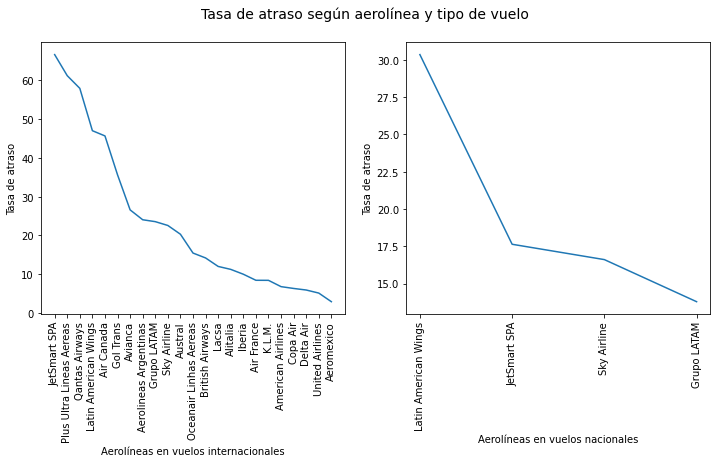

In [15]:
#Atrasos según aerolínea en vuelos nacionales e internacionales
df_aux = df[['TIPOVUELO', 'OPERA', 'one', 'atraso_15']].groupby(['TIPOVUELO', 'OPERA'], as_index=False).sum()
df_aux['tasa_atraso'] = df_aux['atraso_15'] / df_aux['one'] * 100

#Tasas de atraso de principales aerolíneas, según tipo de vuelo
print(df_aux[df_aux['TIPOVUELO']=='I'].sort_values(by=['one'], ascending=False).head(7))
print()
print(df_aux[df_aux['TIPOVUELO']=='N'].sort_values(by=['one'], ascending=False).head(7))

#Gráficos de tasas de atraso, según tipo de vuelo
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plt1 = sns.lineplot(
    data = df_aux[df_aux['TIPOVUELO']=='I'].sort_values(by=['tasa_atraso'], ascending=False), 
    x = 'OPERA', 
    y = 'tasa_atraso', 
    ax = ax[0]
    )
plt1.set(xlabel='Aerolíneas en vuelos internacionales', ylabel='Tasa de atraso')
plt1.tick_params(axis='x', rotation=90)
fig.suptitle('Tasa de atraso según aerolínea y tipo de vuelo', fontsize=14)
plt2 = sns.lineplot(
    data = df_aux[df_aux['TIPOVUELO']=='N'].sort_values(by=['tasa_atraso'], ascending=False), 
    x = 'OPERA', 
    y = 'tasa_atraso', 
    ax = ax[1]
    )
plt2.set(xlabel='Aerolíneas en vuelos nacionales', ylabel='Tasa de atraso')
plt2.tick_params(axis='x', rotation=90)


[Text(0.5, 1.0, 'Tasa de atraso según mes y tipo de vuelo'),
 Text(0.5, 0, 'Mes'),
 Text(0, 0.5, 'Tasa de atraso')]

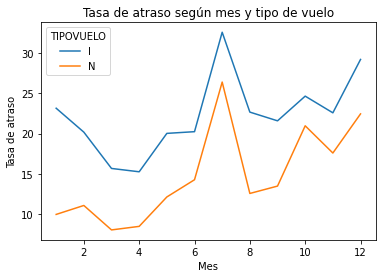

In [16]:
#Atrasos según mes del año en vuelos nacionales e internacionales
df_aux = df[['TIPOVUELO','MES','one','atraso_15']].groupby(['TIPOVUELO','MES'], as_index=False).sum()
df_aux['tasa_atraso'] = df_aux['atraso_15'] / df_aux['one'] * 100

plt1 = sns.lineplot(
    data = df_aux, 
    x = 'MES', 
    y = 'tasa_atraso', 
    hue = 'TIPOVUELO'
    )
plt1.set(title = 'Tasa de atraso según mes y tipo de vuelo', xlabel='Mes', ylabel='Tasa de atraso')

[Text(0.5, 1.0, 'Tasa de atraso según día y tipo de vuelo'),
 Text(0.5, 0, 'Día de la semana'),
 Text(0, 0.5, 'Tasa de atraso')]

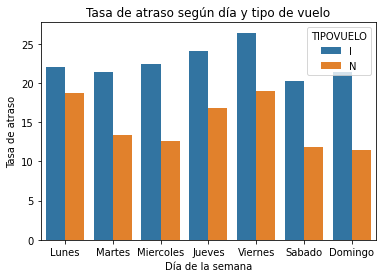

In [17]:
#Atrasos según día de la semana en vuelos nacionales e internacionales
df_aux = df[['TIPOVUELO','DIANOM','one','atraso_15']].groupby(['TIPOVUELO','DIANOM'], as_index=False).sum()
df_aux['tasa_atraso'] = df_aux['atraso_15'] / df_aux['one'] * 100
plt1 = sns.barplot(
    data=df_aux, 
    x='DIANOM', 
    y='tasa_atraso', 
    hue='TIPOVUELO', 
    estimator=sum, 
    order=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
    )
plt1.set(title = 'Tasa de atraso según día y tipo de vuelo', xlabel='Día de la semana', ylabel='Tasa de atraso')

[Text(0, 0, '15.8709'), Text(0, 0, '13.8896')]

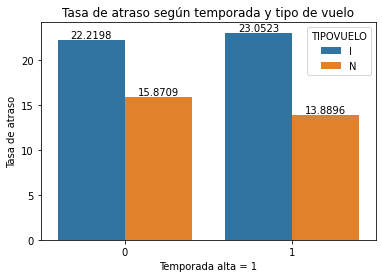

In [18]:
#Atrasos según temporada en vuelos nacionales e internacionales
df_aux = df[['TIPOVUELO','temporada_alta','one','atraso_15']].groupby(['TIPOVUELO','temporada_alta'], as_index=False).sum()
df_aux['tasa_atraso'] = df_aux['atraso_15'] / df_aux['one'] * 100
plt1 = sns.barplot(
    data=df_aux, 
    x='temporada_alta', 
    y='tasa_atraso', 
    hue='TIPOVUELO', 
    estimator=sum
    )
plt1.set(
    title = 'Tasa de atraso según temporada y tipo de vuelo', 
    xlabel='Temporada alta = 1', 
    ylabel='Tasa de atraso'
    )
plt1.bar_label(plt1.containers[0])
plt1.bar_label(plt1.containers[1])

[Text(0, 0, '12.5'), Text(0, 0, '15.6112'), Text(0, 0, '19.6632')]

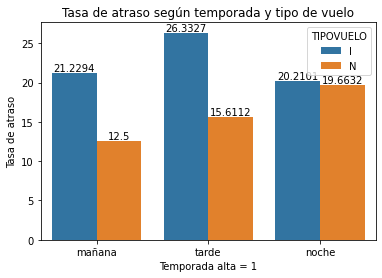

In [19]:
#Atrasos según período del día
df_aux = df[['TIPOVUELO','periodo_dia','one','atraso_15']].groupby(['TIPOVUELO','periodo_dia'], as_index=False).sum()
df_aux['tasa_atraso'] = df_aux['atraso_15'] / df_aux['one'] * 100
plt1 = sns.barplot(
    data=df_aux, 
    x='periodo_dia', 
    y='tasa_atraso', 
    hue='TIPOVUELO', 
    estimator=sum, 
    order=['mañana', 'tarde', 'noche']
    )
plt1.set(
    title = 'Tasa de atraso según temporada y tipo de vuelo', 
    xlabel='Temporada alta = 1', 
    ylabel='Tasa de atraso'
    )
plt1.bar_label(plt1.containers[0])
plt1.bar_label(plt1.containers[1])

[Text(0.5, 1.0, 'Tasa de atraso según hora del día y tipo de vuelo'),
 Text(0.5, 0, 'Hora del día'),
 Text(0, 0.5, 'Tasa de atraso')]

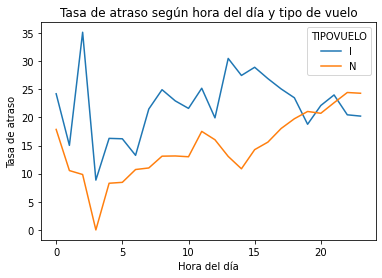

In [20]:
#Atrasos según hora del día
df_aux = df[['TIPOVUELO','Hora','one','atraso_15']].groupby(['TIPOVUELO','Hora'], as_index=False).sum()
df_aux['tasa_atraso'] = df_aux['atraso_15'] / df_aux['one'] * 100
plt1 = sns.lineplot(
    data = df_aux, 
    x = 'Hora', 
    y = 'tasa_atraso', 
    hue = 'TIPOVUELO'
    )
plt1.set(
    title = 'Tasa de atraso según hora del día y tipo de vuelo', 
    xlabel='Hora del día', 
    ylabel='Tasa de atraso'
    )

In [21]:
#LLama la atención el pico a las 2 AM en los vuelos internacionales.
print('Operadores asociados a los atrasos a las 2 AM')
print(df['OPERA'][(df.Hora==2) & (df.atraso_15==1) & (df.TIPOVUELO=='I')].value_counts())
print()
print('Destinos asociados a los principales operadores con altos atrasos a las 2 AM')
print()
print(df[['OPERA', 'SIGLADES']][
    (df.Hora==2) &
    (df.atraso_15==1) & 
    (df.TIPOVUELO=='I') & 
    (df.OPERA=='Latin American Wings')
    ].value_counts())
print()
print(df[['OPERA', 'SIGLADES']][
    (df.Hora==2) & 
    (df.atraso_15==1) & 
    (df.TIPOVUELO=='I') & 
    (df.OPERA=='Grupo LATAM')
    ].value_counts())
print()
print(df[['OPERA', 'SIGLADES']][
    (df.Hora==2) & 
    (df.atraso_15==1) & 
    (df.TIPOVUELO=='I') & 
    (df.OPERA=='Gol Trans')
    ].value_counts())

Operadores asociados a los atrasos a las 2 AM
Latin American Wings      71
Grupo LATAM               17
Gol Trans                 15
Copa Air                   7
Oceanair Linhas Aereas     1
Name: OPERA, dtype: int64

Destinos asociados a los principales operadores con altos atrasos a las 2 AM

OPERA                 SIGLADES
Latin American Wings  Lima        71
dtype: int64

OPERA        SIGLADES     
Grupo LATAM  Buenos Aires     14
             Cancun            1
             Florianapolis     1
             Lima              1
dtype: int64

OPERA      SIGLADES      
Gol Trans  Rio de Janeiro    12
           Sao Paulo          3
dtype: int64


Sobre la composición de la tasa de atraso:

* Existe una heterogeneidad importante en la tasa de atrasos en casi todas las variables observadas.
* La tasa de atraso por destino es liderada por los destinos internacionales, aunque los 4 primeros (Quito, Cochabamba, Puerto Stanley y Ushuia [*sic*]) están asociados a un escaso número de vuelos. Los dos destinos internacionales con mayor tasa  de atrasos y un número importante de vuelos son las ciudades austrialianas Sidney y Melbourne, ambas con tasas mayores al 50%. Auckland, también en Oceanía, tiene una tasa importante de atrasos (37.4%). Tal vez sea relevante la distancia del vuelo o el continente de destino en la tasa de atraso.
* En términos mensuales, diciembre y julio son los meses que presentan la mayor tasa de atraso, tanto en los vuelos nacionales como en los internacionales.
* En relación a los días de la semana, en el segmento internacional los días viernes y jueves lideran los atrasos, mientras que los fines de semana presentan la menor tasa de atraso. A su vez, en el segmento nacional, los lunes y viernes lideran los atrasos.
* Por tipo de aerolínea, se observa un alta variabilidad en la tasa de atraso. El Grupo LATAM destaca en el segmento nacional con la menor tasa de atraso, mientras que en el segmento internacional su tasa de atraso se encuentra ligeramente por sobre el promedio (23.5>22.6).
* En el indicador de temporada alta asociada al tipo de vuelo internacional se observa el menor cambio en la tasa de atraso, el cual genera un aumento de apenas 3.7% en la tasa. En el segmento nacional, en contraste, cae la tasa de atraso en la temporada alta.
* Según periodo del día, en los vuelos internacionales la mayor tasa de atraso se observa durante la tarde, mientras que en los nacionales la mayor tasa de atraso es en la noche.
* Finalmente, según hora del día se destacan bajas tasas de atraso entre las 3 AM y 6 AM, y un máximo en los vuelos internacionales a las 2 AM. Este pico está explicado mayoritariamente por vuelos de la aerolínea LAW a Lima, Grupo LATAM a Buenos Aires y Gol a Rio de Janeiro, con 71, 14 y 12 atrasos en el período, respectivamente. Esta variable revela una heterogeneidad importante que se esconde dentro de las categorías del período del día. Dado lo anterior, puede ser más informativo usar `Hora` que `periodo_dia`. Sin embargo, añadir demasiadas *dummies* podría generar problemas en el desempeño de los modelos por *overfitting*.

Sobre las variables que pudieran influir en la predicción de atrasos:

* Es de esperarse que las variables que presentan mayor variabilidad en relación a la tasa de atraso influyan más en la predicción.
* Para entrenar un modelo, entre los datos originales y los sintéticos contamos con las variables `MES`, `DIANOM`, `TIPOVUELO`, `OPERA`, `SIGLADES`, `temporada_alta`, `periodo_dia` y `Hora`. Dada la multicolinealidad entre las dos últimas variables, preferiremos `Hora` ya que aportará mayor variabilidad a los modelos, teniendo presente que se añadirán 23 *dummies* a los features al hacer Hot Enoding.

##### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

Los datos están desbalanceados según el número de atrasos, con un 18.5% de los casos con atrasos sobre 15 minutos. Si bien el desbalance no es severo, lo tendremos en cuenta para la evaluación de los algoritmos por el impacto que pueda tener en el desempeño de los clasificadores en la clase menos frecuente.

In [22]:
print('Distribución de atrasos en base completa')
print('Número de casos')
print(df['atraso_15'].value_counts())
print('Distribución porcentual')
print(df['atraso_15'].value_counts()/df['atraso_15'].count()*100)


Distribución de atrasos en base completa
Número de casos
0    55592
1    12614
Name: atraso_15, dtype: int64
Distribución porcentual
0    81.506026
1    18.493974
Name: atraso_15, dtype: float64


In [23]:
#Definimos los labels a estimar y los features.
#Como todas las variables son categóricas, las convertimos en dicotómicas ('temporada_alta' no necesita conversión).
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(df[['MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLADES', 'Hora']])
X = pd.DataFrame(encoded.toarray(), columns=one_hot.get_feature_names_out())

#Se elimina la última dummy por categoría para evitar redundancia en los features (multicolinealidad)
del X['MES_12']
del X['DIANOM_Domingo']
del X['TIPOVUELO_N']
del X['OPERA_United Airlines']
del X['SIGLADES_Washington']
del X['Hora_0']

#Se agrega variable no transformada
X['temporada_alta'] = df['temporada_alta']

#Variable objetivo
y = df[['atraso_15']]


C:\Users\oscar\AppData\Local\Temp\ipykernel_5356\3302117408.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['temporada_alta'] = df['temporada_alta']


##### Lazy Predict

Usaremos Lazy Predict para hacer un vistazo rápido del desempeño de varios modelos de amplio uso para ejercicios de clasificación. Por el desbalance de de la clase a predecir, haremos ejercicios sin y con balance en el número de atrasos.

In [24]:
#Se generan conjuntos de prueba sin balancear el número de atrasos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#Se vigila proporción de la clase a predecir entre los grupos de entrenamiento y de prueba
print('Distribución de atrasos en conjunto de entrenamiento')
print(y_train['atraso_15'].value_counts()/y_train['atraso_15'].count()*100)
print('Distribución de atrasos en conjunto de Prueba')
print(y_test['atraso_15'].value_counts()/y_test['atraso_15'].count()*100)
print('>>>La distribución es similar. No es necesario forzar la estraficación<<<')
print('\n')

#Se escogen modelos a entrenar
import lazypredict
from lazypredict.Supervised import CLASSIFIERS
print(list(enumerate(CLASSIFIERS)))
alg_list = list(lazypredict.Supervised.CLASSIFIERS[i] for i in [1,2,5,9,10,15,21])

#Se entrenan varios modelos usando Lazy Predict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(random_state=42, classifiers=alg_list)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

#Se echa un vistazo a los resultados, ordenados por 'Balanced Accuracy', considerando que las clases están desbalanceadas
print('Resultados sin balancear el número de atrasos')
models.sort_values(by=['Balanced Accuracy', 'Accuracy'], ascending=False)

Distribución de atrasos en conjunto de entrenamiento
0    81.599589
1    18.400411
Name: atraso_15, dtype: float64
Distribución de atrasos en conjunto de Prueba
0    81.131799
1    18.868201
Name: atraso_15, dtype: float64
>>>La distribución es similar. No es necesario forzar la estraficación<<<


[(0, ('AdaBoostClassifier', <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>)), (1, ('BaggingClassifier', <class 'sklearn.ensemble._bagging.BaggingClassifier'>)), (2, ('BernoulliNB', <class 'sklearn.naive_bayes.BernoulliNB'>)), (3, ('CalibratedClassifierCV', <class 'sklearn.calibration.CalibratedClassifierCV'>)), (4, ('CategoricalNB', <class 'sklearn.naive_bayes.CategoricalNB'>)), (5, ('DecisionTreeClassifier', <class 'sklearn.tree._classes.DecisionTreeClassifier'>)), (6, ('DummyClassifier', <class 'sklearn.dummy.DummyClassifier'>)), (7, ('ExtraTreeClassifier', <class 'sklearn.tree._classes.ExtraTreeClassifier'>)), (8, ('ExtraTreesClassifier', <class 'sklearn.ensemble._forest.Ex

100%|██████████| 7/7 [00:27<00:00,  4.00s/it]

Resultados sin balancear el número de atrasos


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.72,0.59,0.59,0.73,0.59
RandomForestClassifier,0.78,0.57,0.57,0.76,14.15
BaggingClassifier,0.77,0.57,0.57,0.75,5.21
DecisionTreeClassifier,0.78,0.57,0.57,0.76,1.43
KNeighborsClassifier,0.80,0.56,0.56,0.76,4.51
BernoulliNB,0.81,0.54,0.54,0.76,0.41
LogisticRegression,0.81,0.52,0.52,0.75,1.67


Para balancear el número de atrasos utilizaremos SMOTE (Synthetic Minority Oversampling Technique), que es un método ampliamente utilizado para lidiar con datos desbalanceados. Si bien, SMOTE no funciona bien con variables categóricas, utilizaremos una variante de SMOTE (`SMOTEN` de la librería `imbalanced-learn`) que permite trabajar con variables categóricas.

In [25]:
#Rebalanceamos la base de entrenamiento con SMOTE, considerando la presencia de variables continuas y categóricas
#SMOTEN admite "sparse matrix" (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTEN.html)
from imblearn.over_sampling import SMOTEN
sampler = SMOTEN(random_state=42)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

#Se verifica balance entre las clases
print(y_train_resampled['atraso_15'].value_counts()/y_train_resampled['atraso_15'].count()*100)

0   50.00
1   50.00
Name: atraso_15, dtype: float64


In [34]:
#Se entrenan varios modelos usando Lazy Predict, con balance entre las clases
models, predictions = clf.fit(X_train_resampled, X_test, y_train_resampled, y_test)

#Se echa un vistazo a los resultados, ordenados por 'Balanced Accuracy', considerando que las clases están desbalanceadas
print('Resultados balanceando el número de atrasos en el conjunto de entrenamiento')
models.sort_values(by=['Balanced Accuracy', 'Accuracy'], ascending=False)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 7/7 [00:38<00:00,  5.50s/it]

Resultados balanceando el número de atrasos en el conjunto de entrenamiento


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.67,0.61,0.61,0.70,0.58
KNeighborsClassifier,0.76,0.59,0.59,0.75,6.08
GaussianNB,0.48,0.59,0.59,0.52,0.63
RandomForestClassifier,0.75,0.58,0.58,0.75,19.24
LogisticRegression,0.73,0.58,0.58,0.73,2.22
DecisionTreeClassifier,0.75,0.57,0.57,0.75,1.54
BaggingClassifier,0.74,0.57,0.57,0.74,8.19


* Balanceando las clases conseguimos aumentar el `Balanced Accuracy` en casi todos los modelos, salvo en el algoritmo Gaussian Naive Bayes (`GaussianNB`). Son notables las mejoras en los algoritmos Bernoulli Naive Bayes (`BernoulliNB`) y `LogisticRegression`.

##### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

* Como los features son solamente *dummies*, al hacer hot-encoding obtenemos un gran número features dispersos (*sparsed*), lo que podría generar un problema de overfitting. Nos hacemos cargo de este riesgo usando *cross validation*. 
* Intentaremos *tunear* los modelos `RandomForestClassifier` y `LogisticRegression`, para intentar obtener un mejor desempeño al mostrado por Lazy Predict.

##### Random Forest

In [27]:
#Buscamos el mejor modelo con Grid Search según balanced accuracy. Usamos default cv=5.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 300], 
    'max_depth': [20, 50, 100], 
    'criterion':['gini', 'entropy']
    }
gs_rfc = GridSearchCV(
    estimator=rfc, 
    param_grid=param_grid, 
    scoring='balanced_accuracy'
    )
gs_rfc.fit(X_train_resampled, y_train_resampled)

#Mostramos el balanced accuracy y los parámetros asociados al mejor modelo
print(gs_rfc.best_score_)
print(gs_rfc.best_params_)

0.8384033130483344
{'criterion': 'entropy', 'max_depth': 100, 'n_estimators': 300}


In [28]:
#Entrenamos el modelo random forest escogido
rfc_1 = RandomForestClassifier(
    random_state=42,
    n_estimators= 300,
    max_depth=100,
    criterion='entropy'
    )
rfc_1.fit(X_train_resampled, y_train_resampled)
y_pred = rfc_1.predict(X_test)

#Mostramos el balanced accuracy
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test,y_pred))

0.5797225402393454


Con Random Forest se obtiene un *balanced accuracy* de 58% sobre el conjunto de prueba, idéntico al obtenido con Lazy Predict.

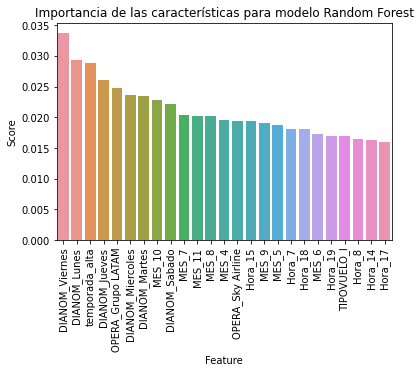

In [29]:
#Calculamos la importancia de los features
rfc_1_fi_array = rfc_1.feature_importances_
rfc_1_fi = pd.DataFrame(list(X_train_resampled.columns), columns = ['Features'])
rfc_1_fi['Score'] = pd.DataFrame(rfc_1_fi_array, columns = ['Score'])['Score']
rfc_1_fi.sort_values(by = ['Score'], ascending = False, inplace = True)
plt1 = sns.barplot(
    data=rfc_1_fi.head(25), 
    x='Features', 
    y='Score', 
    estimator=sum
    )
plt1.set(title = 'Importancia de las características para modelo Random Forest', xlabel='Feature', ylabel='Score')
plt1.tick_params(axis='x', rotation=90)

##### Logistic Regression

In [30]:
#Buscamos el mejor modelo con Grid Search según balanced accuracy
from sklearn.linear_model import LogisticRegression
import numpy as np
lrc = LogisticRegression()
param_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],  
    'C': np.logspace(-3,3,7)
    }
gs_lrc = GridSearchCV(
    estimator=lrc, 
    param_grid=param_grid, 
    scoring='balanced_accuracy'
    )
gs_lrc.fit(X_train_resampled, y_train_resampled)

#Mostramos el balanced accuracy y los parámetros asociados al mejor modelo
print(gs_lrc.best_score_)
print(gs_lrc.best_params_)

0.776616350183352
{'C': 1.0, 'solver': 'lbfgs'}


In [38]:
#Entrenamos el modelo logistic regression escogido
lrc_1 = LogisticRegression(
    random_state=42,
    solver= 'lbfgs',
    C=1,
    )
lrc_1.fit(X_train_resampled, y_train_resampled)
y_pred = lrc_1.predict(X_test)

#Mostramos el balanced accuracy
print(balanced_accuracy_score(y_test,y_pred))

0.5750737687401944


Con regresión logística se obtiene un *balanced accuracy* de 58% sobre el conjunto de prueba, idéntico al obtenido con Lazy Predict.

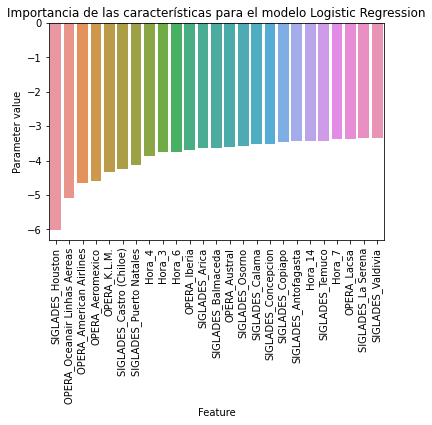

In [39]:
#Calculamos la importancia de los features. Como es un modelo lineal, el valor absoluto de los parámetros entrega el efecto sobre la variable objetivo
lrc_1_fi_array = lrc_1.coef_.flatten()
lrc_1_fi = pd.DataFrame(list(X_train_resampled.columns), columns = ['Features'])
lrc_1_fi['Param_value'] = pd.DataFrame(lrc_1_fi_array, columns = ['Param_value'])['Param_value']
lrc_1_fi['abs_pv'] = pd.DataFrame(abs(lrc_1_fi_array), columns = ['abs_pv'])['abs_pv']
lrc_1_fi.sort_values(by = ['abs_pv'], ascending = False, inplace = True)
plt1 = sns.barplot(
    data=lrc_1_fi.head(25), 
    x='Features', 
    y='Param_value', 
    estimator=sum
    )
plt1.set(title = 'Importancia de las características para el modelo Logistic Regression', xlabel='Feature', ylabel='Parameter value')
plt1.tick_params(axis='x', rotation=90)

##### Comentarios finales

Comentarios generales:

* El atraso en los vuelos puede representar un costo importante para una aerolínea. Los atrasos pueden afectar la percepción de calidad del servicio por parte de los usuarios, la reputación de la aerolínea y se pueden generar costos adicionales por multas, o por compensaciones o indemnizaciones a los usuarios afectados.
* Los atrasos pueden estar causados por una variedad de factores, muchos de los cuales no son observables en la base de datos con la que hicimos este ejercicio, como lo son los de origen climatológico, administrativo-burocrático, asociado a la tripulación, asociado a algún problema técnico, asociado a los pasajeros o su equipaje, asociado a la carga, por temas de seguridad, problemas en el aeropuerto de destino, etc.
* Desconocemos el uso que se le quiere dar a este ejercicio. Esta información es relevante, ya que influye en la exigencia que se le impondrá al desempeño de los modelos, según los costos asociados al error de predicción (falsos positivos y falsos negativos).
* Con todo, se entrenaron los modelos de *machine learning* indicados, haciendo uso de la información disponible.

Comentarios asociados a los modelos y sus resultados:

* A través de Lazy Predict obtuvimos el desempeño más alto con el modelo Naive Bayes Bernoulli, que alcanzó un *balanced accuracy* del 61% después de balancear las clases en el conjunto de entrenamiento.
* Intentamos optimizar los modelos Random Forest y Regresión Logística, usando *grid search* para encontrar los mejores hiperparámetros y *cross validation* para controlar por *overfitting*. SIn embargo, no conseguimos mejorar su desempeño, alcanzando *balanced accuracies* sobre el conjunto de prueba idénticos a los obtenidos con Lazy Predict.
* Las variables que más influyen en los atrasos según el modelo **Random Forest** están asociadas al calendario (días, meses, horas), y fuera de estos, si el vuelo es operado por LATAM Airlines o Sky Airlines.
  * Los días **viernes**, **lunes** y **jueves** se destacan entre los primeros del listado. En estos días se observa igualmente el mayor número de vuelos, generando en esos días una mayor exigencia a la operación de las aerolíneas y del aeropuerto, favoreciendo la ocurrencia de atrasos.
  * La **temporada alta** también destaca, donde la mayor afluencia de pasajeros por motivos de ocio también añadiría presiones a la operación de los vuelos.
  * La mención a las aerolíneas **Latam Airlines** y **Sky Airlines** estaría asociado a que son las principales operadoras, y las que presentan mayor número de atrasos en términos absolutos. Aun cuando no tienen la mayor tasa de atraso, el alto número de operaciones sería la razón por la que se destacan por el modelo Random Forest.
* Según el modelo **Logistic Regression**, las variables que individualmente más influyen *negativamente* en los atrasos están asociadas a los aeropuertos de destino, los operadores y a ciertas horas del día.
  * Los destinos **Houston**, **Castro** y **Puerto Natales** destacan con una alta incidencia negativa en la probabilidad de atraso. Houston es uno de los destinos internacionales con menor tasa de atraso, y corresponde a un HUB aéreo internacional con un alto nivel de desempeño que le permitiría generar pocos atrasos a los vuelos que tienen ese destino. Castro y Puerto Natales, a su vez, corresponden a aeropuertos no concesionados con un tráfico poco importante y que tienen asociados las menores tasas de atraso entre los destinos nacionales.
  * Entre las aerolíneas destacan con una alta incidencia negativa **Oceanair**, **AA**, **Aeroméxico**, **KLM**, **Iberia** y **Austral**, que son aerolíneas con bajas tasas de atraso.
  * Destacan también con incidencias negativas las horas **4 AM**, **3 AM** y **6 AM**. La hora 3 AM es la hora con menor tasa de atraso, la hora 4 AM es la segunda hora con menor tasa de atraso en los vuelos nacionales, mientras que la hora 6 AM corresponde a la segunda hora con menor tasa de atrasos en los vuelos internacionales. Las horas 3 AM y 4 AM se pueden estar beneficiando del bajo tráfico de salida en el aeropuerto de Santiago.

¿Cómo mejorar el desempeño de los modelos?

* La predicción puede mejorar si incorporamos más observaciones (años) al dataset.
* También puede mejorar si incorporamos features que estén más vinculados a los mecanismos que generan los atrasos, como por ejemplo:
  * Antigüedad de las aeronaves.
  * Adversidad climatológica en el aeropuerto de origen en la fecha del vuelo.
  * Previsión de adversidad climatológica en el aeropuerto de destino en la fecha llegada del vuelo.
  * Nivel de uso de la capacidad del aeropuerto de origen.
  * Nivel de uso de la capacidad del aeropuerto de destino.
  * Algún indicador de calidad estructural del aeropuerto de destino.
  * Número de pasajeros en conexión con el vuelo.
  * Distancia asociada al vuelo.
* Por último, también puede ayudar a mejorar el desempeño el contar con información asociada a las causas específicas de los atrasos, a fin de aislar este efecto del resto de las variables. Por ejemplo:
  * Atrasos producidos por pasajeros (ral vez una *dummy* indicando si el atraso fue por un pasajero que llegó tarde a embarcar).
  * Atrasos atribuibles a la tripulación.
  * Atrasos de origen técnico.
  * Atrasos asociados al manejo de la nave en tierra (carga de equipaje, combustible, aseo, etc.)

In [40]:
#Obtiene datos para requeriments.txt
import session_info
session_info.show()